# Batagelj-Zaveršnik k-core decomposition algorithm

In [25]:
using Graphs

function batagelj_zaversnik_k_core(g::SimpleGraph)
  n_v = nv(g)
  D = zeros(Int64, n_v)
  pos = zeros(Int64, n_v)
  vert = zeros(Int64, n_v)
  md = 0
  for v in 1:n_v
    D[v] = degree(g, v)
    md = max(md, D[v])
  end

  bin = zeros(Int64, md)

  for v in 1:n_v
    bin[D[v]] += 1
  end

  start = 1
  for d in 1:md
    num = bin[d]
    bin[d] = start
    start += num
  end

  for v in 1:n_v
    pos[v] = bin[D[v]]
    vert[pos[v]] = v
    bin[D[v]] += 1
  end

  for d in md:-1:2
    bin[d] = bin[d-1]
  end
  bin[1] = 1

  for i in 1:n_v
    v = vert[i]
    for u in neighbors(g, v)
      if D[u] > D[v]
        du = D[u]
        pu = pos[u]
        pw = bin[du]
        w = vert[pw]
        if u != w
          pos[u] = pw
          pos[w] = pu
          vert[pu] = w
          vert[pw] = u
        end
        bin[du] += 1
        D[u] -= 1
      end
    end
  end

  D
end

batagelj_zaversnik_k_core (generic function with 1 method)

# Simple test graphs (15-20 nodes)

Graphs are generated by a human. They are hardcoded here.

In [26]:
using Graphs

small_graph_1 = SimpleGraph()

for i in 1:18
  add_vertex!(small_graph_1)
end

edge_pairs_1 = [
  (1, 2),
  (1, 3),
  (2, 3),
  (2, 8),
  (4, 7),
  (4, 8),
  (5, 6),
  (6, 7),
  (7, 8),
  (7, 10),
  (7, 11),
  (7, 12),
  (7, 13),
  (7, 15),
  (8, 9),
  (8, 10),
  (8, 12),
  (9, 16),
  (12, 14),
  (14, 18),
  (16, 17),
]

for (i, j) in edge_pairs_1
  add_edge!(small_graph_1, i, j)
end

println(k_core(small_graph_1))
println(batagelj_zaversnik_k_core(small_graph_1))

[1, 2, 3, 4, 7, 8, 10, 12]


[2, 2, 2, 2, 1, 1, 2, 2, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1]


Since shell index 2 is the largest one in this graph, by comparing the result of the implemented algorithm with the Graphs.jl implementation we can conclude that the implementation is correct.

In [27]:
using Graphs

small_graph_2 = SimpleGraph()

for i in 1:17
  add_vertex!(small_graph_2)
end

edge_pairs_2 = [
  (1, 2),
  (1, 3),
  (2, 3),
  (3, 4),
  (4, 7),
  (4, 8),
  (4, 10),
  (5, 11),
  (6, 7),
  (7, 8),
  (7, 9),
  (7, 10),
  (7, 14),
  (7, 16),
  (8, 10),
  (8, 11),
  (9, 13),
  (10, 15),
  (10, 17),
  (11, 12),
]

for (i, j) in edge_pairs_2
  add_edge!(small_graph_2, i, j)
end

println(k_core(small_graph_2))
println(batagelj_zaversnik_k_core(small_graph_2))

[4, 7, 8, 10]
[2, 2, 2, 3, 1, 1, 3, 3, 1, 3, 1, 1, 1, 1, 1, 1, 1]


In [28]:
using Graphs

small_graph_3 = SimpleGraph()

for i in 1:23
  add_vertex!(small_graph_3)
end

egde_pairs_3 = [
  (1, 7),
  (2, 7),
  (3, 7),
  (3, 8),
  (3, 12),
  (4, 5),
  (5, 9),
  (6, 7),
  (6, 12),
  (7, 12),
  (8, 12),
  (9, 13),
  (10, 11),
  (11, 12),
  (11, 15),
  (11, 16),
  (12, 13),
  (12, 16),
  (12, 17),
  (12, 18),
  (13, 14),
  (13, 18),
  (15, 19),
  (15, 20),
  (16, 21),
  (17, 21),
  (18, 22),
  (18, 23),
]

for (i, j) in egde_pairs_3
  add_edge!(small_graph_3, i, j)
end

println(k_core(small_graph_3))
println(batagelj_zaversnik_k_core(small_graph_3))

[3, 6, 7, 8, 11, 12, 13, 16, 17, 18, 21]
[1, 1, 2, 1, 1, 2, 2, 2, 1, 1, 2, 2, 2, 1, 1, 2, 2, 2, 1, 1, 2, 1, 1]


In [29]:
using Grpahs

large_graph_1 = SimpleGraph(100, 1650)

println(k_core(large_graph_1))
println(batagelj_zaversnik_k_core(large_graph_1))

ArgumentError: ArgumentError: Package Grpahs not found in current path.
- Run `import Pkg; Pkg.add("Grpahs")` to install the Grpahs package.

In [30]:
using Graphs

large_graph_2 = SimpleGraph(1000, 166500)

println(k_core(large_graph_2))
println(batagelj_zaversnik_k_core(large_graph_2))

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 

In [31]:
rand(1:10, 5)

5-element Vector{Int64}:
 2
 4
 3
 9
 3

In [46]:
using Random
using Graphs

function erdos_renyi_simple_graph(vs::Int64, es::Int64)
  S = Iterators.product(1:vs, 1:vs) |> collect |> filter(x -> x[1] != x[2])
  Random.shuffle!(S)

  G = SimpleGraph(vs)

  for (i, j) in S[1:es]
    add_edge!(G, i, j)
  end

  G
end

erdos_renyi_simple_graph (generic function with 1 method)

In [47]:
using Graphs

erdos_renyi_graph_1 = erdos_renyi_simple_graph(10000, 165000)

println(k_core(erdos_renyi_graph_1))
println(batagelj_zaversnik_k_core(erdos_renyi_graph_1))

[1, 2, 3, 4, 6, 7, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 21, 22, 23, 24, 25, 26, 27, 28, 29, 31, 32, 33, 35, 36, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 135, 136, 137, 138, 139, 140, 141, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 202, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 217, 218, 219, 220, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235

 2043, 2044, 2045, 2046, 2047, 2048, 2049, 2050, 2051, 2052, 2054, 2055, 2056, 2057, 2058, 2059, 2060, 2061, 2062, 2063, 2064, 2065, 2066, 2067, 2068, 2069, 2070, 2071, 2072, 2073, 2074, 2075, 2076, 2077, 2078, 2079, 2080, 2081, 2082, 2083, 2085, 2086, 2087, 2088, 2089, 2090, 2091, 2092, 2093, 2094, 2095, 2096, 2099, 2100, 2102, 2103, 2104, 2105, 2106, 2107, 2108, 2109, 2110, 2111, 2112, 2113, 2114, 2115, 2116, 2117, 2118, 2119, 2120, 2121, 2122, 2123, 2124, 2125, 2126, 2127, 2128, 2129, 2130, 2131, 2132, 2133, 2134, 2135, 2137, 2139, 2140, 2141, 2142, 2143, 2144, 2145, 2146, 2147, 2149, 2150, 2151, 2152, 2153, 2154, 2155, 2156, 2157, 2158, 2159, 2160, 2161, 2162, 2163, 2164, 2165, 2166, 2167, 2168, 2169, 2170, 2171, 2172, 2173, 2174, 2175, 2176, 2177, 2178, 2180, 2181, 2183, 2184, 2185, 2186, 2187, 2188, 2189, 2190, 2192, 2193, 2194, 2195, 2196, 2197, 2198, 2200, 2201, 2202, 2203, 2205, 2206, 2207, 2208, 2209, 2211, 2212, 2213, 2214, 2215, 2216, 2217, 2218, 2219, 2220, 2221, 2222, 222

, 3897, 3898, 3899, 3900, 3901, 3902, 3903, 3904, 3905, 3906, 3907, 3908, 3909, 3910, 3911, 3912, 3913, 3914, 3915, 3916, 3917, 3918, 3920, 3921, 3923, 3924, 3925, 3926, 3927, 3928, 3929, 3930, 3931, 3933, 3934, 3935, 3936, 3937, 3938, 3939, 3940, 3942, 3943, 3944, 3945, 3946, 3947, 3948, 3949, 3950, 3951, 3952, 3953, 3954, 3955, 3956, 3957, 3958, 3959, 3960, 3961, 3962, 3963, 3964, 3965, 3966, 3967, 3968, 3969, 3970, 3971, 3972, 3973, 3974, 3975, 3976, 3978, 3979, 3980, 3981, 3982, 3983, 3984, 3985, 3986, 3987, 3988, 3989, 3990, 3991, 3992, 3993, 3994, 3995, 3996, 3998, 3999, 4000, 4001, 4002, 4003, 4004, 4005, 4006, 4007, 4008, 4009, 4010, 4011, 4012, 4013, 4014, 4015, 4016, 4018, 4020, 4021, 4022, 4023, 4024, 4025, 4026, 4027, 4028, 4029, 4030, 4031, 4032, 4033, 4034, 4035, 4036, 4037, 4039, 4040, 4041, 4043, 4044, 4045, 4046, 4047, 4048, 4050, 4051, 4052, 4053, 4054, 4055, 4056, 4057, 4058, 4059, 4060, 4061, 4062, 4063, 4064, 4065, 4066, 4067, 4068, 4069, 4070, 4071, 4072, 4073, 40

 5761, 5762, 5763, 5764, 5765, 5766, 5767, 5768, 5769, 5770, 5771, 5772, 5773, 5774, 5775, 5776, 5777, 5778, 5779, 5780, 5781, 5782, 5783, 5784, 5785, 5786, 5787, 5788, 5789, 5791, 5792, 5793, 5794, 5795, 5796, 5797, 5799, 5800, 5801, 5802, 5803, 5804, 5805, 5806, 5808, 5809, 5811, 5812, 5813, 5814, 5815, 5816, 5817, 5818, 5819, 5820, 5821, 5822, 5823, 5824, 5825, 5826, 5827, 5828, 5829, 5830, 5831, 5832, 5833, 5834, 5836, 5837, 5838, 5839, 5841, 5842, 5843, 5844, 5845, 5846, 5847, 5848, 5849, 5850, 5852, 5853, 5854, 5855, 5856, 5857, 5858, 5859, 5860, 5861, 5862, 5863, 5864, 5865, 5866, 5867, 5868, 5869, 5870, 5871, 5872, 5873, 5874, 5875, 5876, 5877, 5878, 5880, 5881, 5882, 5883, 5884, 5885, 5886, 5887, 5888, 5889, 5890, 5891, 5892, 5893, 5895, 5897, 5898, 5899, 5900, 5901, 5902, 5903, 5904, 5905, 5906, 5907, 5908, 5910, 5911, 5912, 5913, 5914, 5915, 5916, 5918, 5919, 5920, 5921, 5922, 5923, 5924, 5925, 5926, 5927, 5929, 5930, 5931, 5932, 5933, 5934, 5937, 5938, 5939, 5940, 5941, 594

, 7625, 7626, 7627, 7628, 7629, 7630, 7631, 7632, 7634, 7635, 7636, 7637, 7638, 7639, 7640, 7641, 7642, 7643, 7644, 7645, 7646, 7647, 7649, 7650, 7651, 7652, 7653, 7654, 7655, 7656, 7657, 7658, 7659, 7660, 7661, 7662, 7663, 7664, 7665, 7666, 7667, 7668, 7669, 7670, 7671, 7672, 7674, 7675, 7676, 7677, 7678, 7679, 7680, 7682, 7683, 7684, 7685, 7686, 7687, 7688, 7689, 7690, 7691, 7692, 7693, 7695, 7696, 7697, 7699, 7700, 7701, 7702, 7704, 7705, 7706, 7707, 7708, 7709, 7710, 7711, 7712, 7713, 7715, 7716, 7717, 7718, 7720, 7721, 7723, 7724, 7725, 7726, 7727, 7729, 7730, 7731, 7733, 7734, 7735, 7736, 7737, 7738, 7739, 7740, 7741, 7742, 7743, 7744, 7745, 7746, 7748, 7749, 7750, 7751, 7752, 7753, 7754, 7755, 7756, 7757, 7759, 7761, 7762, 7763, 7764, 7765, 7766, 7767, 7768, 7769, 7770, 7771, 7772, 7773, 7774, 7775, 7776, 7777, 7778, 7780, 7781, 7783, 7784, 7786, 7787, 7788, 7789, 7790, 7791, 7792, 7793, 7794, 7795, 7796, 7797, 7798, 7799, 7800, 7801, 7802, 7803, 7804, 7805, 7806, 7807, 7808, 78

 9061, 9063, 9064, 9065, 9066, 9067, 9069, 9070, 9071, 9072, 9073, 9074, 9075, 9076, 9078, 9079, 9080, 9081, 9082, 9083, 9084, 9085, 9086, 9088, 9089, 9090, 9091, 9092, 9093, 9094, 9095, 9096, 9097, 9098, 9099, 9100, 9101, 9102, 9103, 9104, 9105, 9106, 9107, 9108, 9109, 9110, 9111, 9112, 9113, 9114, 9115, 9117, 9118, 9119, 9120, 9121, 9122, 9123, 9124, 9125, 9126, 9127, 9128, 9129, 9130, 9131, 9132, 9133, 9134, 9136, 9138, 9139, 9140, 9141, 9143, 9144, 9145, 9147, 9148, 9149, 9150, 9152, 9153, 9154, 9155, 9156, 9157, 9158, 9159, 9160, 9161, 9162, 9163, 9164, 9165, 9166, 9167, 9168, 9169, 9170, 9171, 9172, 9173, 9174, 9175, 9176, 9177, 9178, 9179, 9180, 9181, 9182, 9183, 9184, 9185, 9186, 9187, 9189, 9190, 9192, 9193, 9194, 9195, 9196, 9197, 9198, 9199, 9200, 9202, 9203, 9204, 9205, 9206, 9207, 9208, 9209, 9210, 9211, 9212, 9213, 9214, 9215, 9217, 9218, 9219, 9220, 9221, 9222, 9223, 9224, 9225, 9226, 9227, 9228, 9229, 9230, 9231, 9232, 9233, 9234, 9235, 9236, 9237, 9238, 9239, 9240, 924

 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 23, 24, 24, 24, 24, 24, 23, 23, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 23, 24, 22, 23, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 23, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 22, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 23, 24, 24, 24, 24, 24, 21, 24, 24, 24, 24, 24, 24, 24, 21, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 23, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 22, 24, 24, 24, 24, 24, 23, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 23, 24, 22, 24, 24, 24, 24, 13, 18, 24, 23, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 19, 24, 24, 24, 24, 24, 23, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 22,

 24, 23, 24, 24, 24, 24, 24, 24, 23, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 23, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 23, 24, 24, 23, 24, 24, 24, 23, 24, 24, 24, 24, 24, 24, 24, 22, 24, 24, 24, 21, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 23, 24, 24, 21, 24, 24, 24, 24, 24, 24, 24, 24, 24, 23, 24, 24, 24, 24, 24, 24, 24, 24, 22, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 22, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 23, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 23, 24, 20, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 20, 24, 24, 24, 20, 24, 24, 24, 24, 24, 24, 21, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 15, 24,

 24, 24, 24, 24, 24, 24, 24, 24, 23, 20, 24, 24, 24, 24, 24, 20, 24, 24, 24, 24, 24, 24, 22, 24, 24, 24, 24, 24, 24, 21, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 21, 24, 24, 24, 24, 20, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 19, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 23, 24, 24, 24, 24, 22, 24, 24, 24, 24, 24, 24, 24, 24, 24, 23, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 17, 24, 24, 24, 24, 24, 21, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 20, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 23, 22, 22, 24, 24, 24, 24, 23, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 23, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24,

 24, 24, 24, 24, 24, 24, 24, 20, 24, 20, 22, 24, 24, 24, 24, 24, 24, 20, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 19, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 20, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 23, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 14, 24, 24, 24, 24, 24, 24, 24, 24, 24, 23, 24, 24, 24, 24, 24, 24, 24, 21, 23, 24, 24, 24, 24, 24, 23, 24, 21, 24, 24, 24, 24, 24, 23, 24, 24, 24, 24, 24, 24, 24, 24, 22, 24, 24, 24, 24, 24, 24, 24, 24, 24, 23, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 23, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 20, 24, 22, 24, 24, 24, 24, 19, 24, 24, 24, 22, 24, 24, 24, 24, 23, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 20, 24, 24, 22, 24, 24, 24, 24, 24, 24, 24, 24, 24,

In [48]:
using Graphs

function gilbert_simple_graph(vs::Int64, p::Float64)
  G = SimpleGraph(vs)

  for i in 1:vs-1
    for j in i+1:vs
      if rand() < p
        add_edge!(G, i, j)
      end
    end
  end
  
  G
end

gilbert_simple_graph (generic function with 1 method)

In [49]:
using Graphs

gilbert_graph_1 = gilbert_simple_graph(10000, 0.0165)

println(k_core(gilbert_graph_1))
println(batagelj_zaversnik_k_core(gilbert_graph_1))

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 195, 196, 197, 198, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 2

 1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1996, 1997, 1998, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2020, 2021, 2022, 2023, 2024, 2025, 2026, 2027, 2028, 2029, 2030, 2031, 2032, 2033, 2034, 2035, 2036, 2037, 2038, 2039, 2040, 2041, 2042, 2043, 2044, 2045, 2046, 2047, 2048, 2049, 2050, 2051, 2052, 2053, 2054, 2055, 2056, 2057, 2058, 2059, 2060, 2061, 2062, 2063, 2064, 2065, 2066, 2067, 2068, 2069, 2070, 2071, 2072, 2073, 2074, 2075, 2076, 2077, 2078, 2079, 2080, 2081, 2082, 2083, 2084, 2085, 2086, 2087, 2088, 2089, 2090, 2091, 2092, 2093, 2094, 2095, 2096, 2097, 2098, 2099, 2100, 2101, 2102, 210

, 3687, 3688, 3689, 3690, 3691, 3692, 3693, 3694, 3695, 3696, 3697, 3698, 3699, 3700, 3701, 3702, 3703, 3704, 3705, 3706, 3707, 3708, 3709, 3710, 3711, 3712, 3713, 3714, 3715, 3716, 3717, 3718, 3719, 3720, 3721, 3722, 3723, 3724, 3725, 3726, 3727, 3728, 3729, 3730, 3731, 3732, 3733, 3734, 3735, 3736, 3737, 3738, 3739, 3740, 3741, 3742, 3743, 3744, 3745, 3746, 3747, 3748, 3749, 3750, 3751, 3752, 3753, 3754, 3755, 3756, 3757, 3758, 3759, 3760, 3761, 3762, 3763, 3764, 3766, 3767, 3768, 3769, 3770, 3771, 3772, 3773, 3774, 3775, 3776, 3777, 3778, 3779, 3780, 3781, 3782, 3783, 3784, 3785, 3786, 3787, 3788, 3789, 3790, 3791, 3792, 3793, 3794, 3795, 3797, 3798, 3799, 3800, 3801, 3802, 3803, 3804, 3805, 3806, 3807, 3808, 3809, 3810, 3811, 3812, 3813, 3814, 3815, 3816, 3817, 3818, 3819, 3821, 3822, 3823, 3824, 3825, 3826, 3827, 3828, 3829, 3830, 3831, 3832, 3833, 3834, 3835, 3836, 3837, 3838, 3839, 3840, 3841, 3842, 3843, 3844, 3845, 3847, 3848, 3849, 3850, 3851, 3852, 3853, 3854, 3855, 3856, 38

 5442, 5443, 5444, 5445, 5446, 5447, 5448, 5449, 5450, 5451, 5452, 5453, 5454, 5455, 5456, 5457, 5458, 5460, 5461, 5462, 5463, 5464, 5465, 5466, 5467, 5468, 5469, 5470, 5471, 5472, 5473, 5474, 5475, 5476, 5477, 5478, 5479, 5480, 5481, 5482, 5483, 5484, 5485, 5486, 5487, 5488, 5489, 5490, 5491, 5492, 5493, 5494, 5495, 5496, 5497, 5498, 5499, 5500, 5501, 5502, 5503, 5504, 5505, 5506, 5507, 5508, 5509, 5511, 5512, 5513, 5514, 5515, 5516, 5517, 5518, 5519, 5520, 5521, 5522, 5523, 5524, 5525, 5526, 5527, 5528, 5529, 5530, 5531, 5532, 5533, 5534, 5535, 5536, 5537, 5538, 5539, 5540, 5541, 5542, 5543, 5544, 5545, 5546, 5547, 5548, 5549, 5550, 5552, 5553, 5554, 5555, 5556, 5557, 5558, 5559, 5560, 5561, 5562, 5563, 5564, 5565, 5566, 5567, 5568, 5569, 5570, 5571, 5572, 5573, 5574, 5575, 5576, 5577, 5578, 5579, 5580, 5581, 5582, 5583, 5584, 5585, 5586, 5587, 5588, 5589, 5590, 5591, 5592, 5593, 5594, 5595, 5596, 5597, 5598, 5599, 5600, 5601, 5602, 5603, 5604, 5605, 5606, 5607, 5608, 5609, 5610, 561

, 7191, 7192, 7193, 7194, 7195, 7196, 7197, 7198, 7199, 7200, 7201, 7202, 7203, 7204, 7205, 7206, 7207, 7208, 7209, 7210, 7211, 7212, 7213, 7214, 7215, 7216, 7217, 7218, 7219, 7220, 7221, 7222, 7223, 7224, 7225, 7226, 7227, 7228, 7230, 7231, 7232, 7233, 7234, 7235, 7236, 7237, 7238, 7239, 7240, 7241, 7242, 7243, 7244, 7245, 7246, 7247, 7248, 7249, 7250, 7251, 7252, 7253, 7254, 7255, 7256, 7257, 7258, 7259, 7260, 7261, 7262, 7263, 7264, 7265, 7266, 7267, 7268, 7269, 7270, 7271, 7272, 7273, 7274, 7275, 7276, 7277, 7278, 7279, 7280, 7281, 7282, 7283, 7284, 7285, 7286, 7287, 7288, 7289, 7290, 7291, 7292, 7293, 7294, 7295, 7296, 7297, 7298, 7299, 7300, 7301, 7302, 7303, 7304, 7305, 7306, 7307, 7308, 7309, 7310, 7311, 7312, 7313, 7314, 7315, 7316, 7317, 7318, 7319, 7320, 7321, 7322, 7323, 7324, 7325, 7326, 7327, 7328, 7329, 7330, 7331, 7332, 7333, 7334, 7335, 7336, 7337, 7338, 7339, 7340, 7341, 7342, 7343, 7344, 7345, 7346, 7347, 7348, 7349, 7350, 7351, 7352, 7353, 7354, 7355, 7356, 7357, 73

, 8642, 8643, 8644, 8645, 8646, 8647, 8648, 8649, 8650, 8651, 8652, 8653, 8654, 8655, 8656, 8657, 8658, 8659, 8660, 8661, 8662, 8663, 8664, 8665, 8666, 8667, 8668, 8669, 8670, 8671, 8672, 8673, 8674, 8675, 8676, 8677, 8678, 8679, 8680, 8681, 8682, 8683, 8684, 8685, 8686, 8687, 8688, 8689, 8690, 8691, 8692, 8693, 8694, 8695, 8696, 8697, 8698, 8699, 8700, 8701, 8702, 8704, 8705, 8706, 8707, 8708, 8709, 8710, 8711, 8712, 8713, 8714, 8715, 8716, 8717, 8718, 8719, 8720, 8721, 8722, 8723, 8724, 8725, 8726, 8727, 8728, 8729, 8731, 8732, 8733, 8734, 8735, 8736, 8737, 8738, 8739, 8740, 8741, 8742, 8743, 8744, 8745, 8746, 8747, 8748, 8749, 8750, 8751, 8752, 8753, 8754, 8755, 8756, 8757, 8758, 8759, 8760, 8761, 8762, 8763, 8764, 8765, 8766, 8767, 8768, 8769, 8770, 8771, 8772, 8773, 8774, 8775, 8776, 8777, 8778, 8779, 8780, 8781, 8782, 8783, 8784, 8785, 8786, 8787, 8788, 8790, 8791, 8792, 8794, 8795, 8796, 8797, 8798, 8799, 8800, 8801, 8802, 8803, 8804, 8805, 8806, 8807, 8808, 8809, 8810, 8811, 88

 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 137, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 136, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138,

 138, 138, 138, 138, 138, 137, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 136, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 134, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 137, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 134, 138, 138, 135, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138,

 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 136, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 135, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138,

138, 138, 138, 138, 138, 138, 138, 138, 138, 134, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 126, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 

138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 135, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 134, 138, 138, 132, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 137, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 137, 138, 138, 138, 138, 138, 138, 138, 130, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 

In [83]:
using Graphs

function barabasi_albert_simple_graph(m0::Int64, p::Float64, N::Int64, m::Int64)
  G = gilbert_simple_graph(m0, p)

  Δ = []
  for i in 1:m0
    append!(Δ, repeat([i], degree(G, i)))
  end

  for i in m0+1:N
    add_vertex!(G)

    for j in 1:m
      v = rand(Δ)
      add_edge!(G, i, v)
      append!(Δ, [v])
    end

    append!(Δ, repeat([i], m))
  end

  G
end

barabasi_albert_simple_graph (generic function with 1 method)

In [99]:
using Graphs

barabasi_albert_graph_1 = barabasi_albert_simple_graph(100, 0.1, 200, 5)

println(k_core(barabasi_albert_graph_1))
println(batagelj_zaversnik_k_core(barabasi_albert_graph_1))

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 25, 26, 27, 30, 31, 32, 33, 34, 35, 36, 38, 40, 43, 44, 45, 46, 48, 49, 50, 51, 54, 55, 56, 57, 58, 59, 60, 63, 64, 65, 69, 71, 72, 74, 75, 77, 78, 79, 82, 83, 84, 86, 87, 88, 90, 91, 92, 93, 94, 95, 96, 97, 98]
[7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 6, 7, 7, 7, 6, 6, 7, 7, 7, 7, 7, 7, 7, 6, 7, 6, 7, 6, 5, 7, 7, 7, 7, 6, 7, 7, 7, 7, 3, 5, 7, 7, 7, 7, 7, 7, 7, 5, 5, 7, 7, 7, 6, 6, 6, 7, 6, 7, 7, 6, 7, 7, 6, 7, 7, 7, 6, 6, 7, 7, 7, 6, 7, 7, 7, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 6, 6, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5]


In [117]:
using Graphs

function stochastic_block_model_simple_graph(N::Int64, q::Int64, m::Vector{Float64}, B::Matrix{Float64})
  G = gilbert_simple_graph(N, 0.005)
  g = Vector{Int64}(undef, N)

  for i in 1:N
    r = rand()
    s = 0.0
    for k in 1:q
      s += m[k]
      if r <= s
        g[i] = k
        break
      end
    end
  end

  for i in 1:N-1
    for j in i+1:N
      if rand() <= B[g[i], g[j]]
        add_edge!(G, i, j)
      end
    end
  end

  G
end

stochastic_block_model_simple_graph (generic function with 1 method)

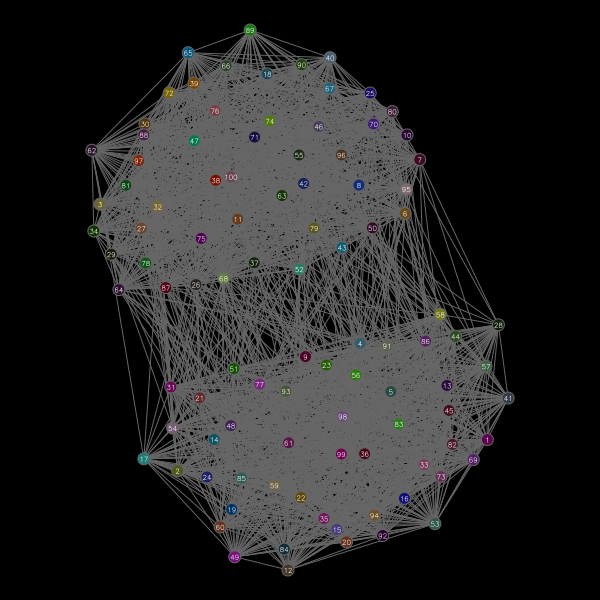

In [118]:
using Graphs
using Karnak
using NetworkLayout
using Colors

stochastic_block_model_graph_1 = stochastic_block_model_simple_graph(100, 3, [0.5, 0.5, 0.5], [0.8 0.1 0.1; 0.1 0.8 0.1; 0.1 0.1 0.8])

@drawsvg begin
  background("black")
  sethue("grey40")
  fontsize(8)
  drawgraph(stochastic_block_model_graph_1,
    layout=stress,
    vertexlabels = 1:nv(stochastic_block_model_graph_1),
    vertexfillcolors = 
      [RGB(rand(3)/2...)
        for i in 1:nv(stochastic_block_model_graph_1)]
  )
end